In [2]:
!pip install biopython dendropy ete3 numpy seaborn matplotlib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=c6d5c9b4ca4a3ef9bfe5afd1134cc68a615ea685abecaf938bff8050f6047a31
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


In [3]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import ParsimonyScorer
from Bio.Phylo.TreeConstruction import ParsimonyTreeConstructor
import matplotlib.pyplot as plt


In [4]:
def rename_sequences(sequences, ids):
    for seq, seq_id in zip(sequences, ids):
        seq.id = seq_id

# Import sequences
t1 = SeqIO.read("falco-alopex.fasta", "fasta")
t2 = SeqIO.read("falco-amurensis.fasta", "fasta")
t3 = SeqIO.read("falco-biarmicus.fasta", "fasta")
t4 = SeqIO.read("falco-cherrug.fasta", "fasta")
t5 = SeqIO.read("falco-chicquera.fasta", "fasta")
t6 = SeqIO.read("falco-columbarius.fasta", "fasta")
t7 = SeqIO.read("falco-cuvierii.fasta", "fasta")
t8 = SeqIO.read("falco-dickinsoni.fasta", "fasta")
t9 = SeqIO.read("falco-eleonorae.fasta", "fasta")
t10 = SeqIO.read("falco-fasciinucha.fasta", "fasta")
t11 = SeqIO.read("falco-jugger.fasta", "fasta")
t12 = SeqIO.read("falco-longipennis.fasta", "fasta")
t13 = SeqIO.read("falco-mexicanus.fasta", "fasta")
t14 = SeqIO.read("falco-zoniventris.fasta", "fasta")
t15 = SeqIO.read("sooty-falcon.fasta", "fasta")

# Rename sequences
sequences = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15]
sequence_ids = ['Kestrel', 'Amur', 'Lanner', 'Saker', 'RedNeck','Merlin','AfrHobby','Dickinson','Eleonora','Taita','Laggar','AusHobby','Prairie','Banded','Sooty']
rename_sequences(sequences, sequence_ids)

# Combine sequences into a new file
waterfrog = SeqIO.write(sequences, "typicalfalcons.fasta", "fasta")

In [7]:
# Load the water frog sequences into MUSCLE
# ... (as in your original code)

# Open the alignment file as a MultipleSeqAlignment object
with open("typicalfalcons.aln", "r") as aln:
    alignment = AlignIO.read(aln, "clustal")

# Calculate Distance Matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

# UPGMA Tree Construction using Bio.Phylo
upgma_constructor = DistanceTreeConstructor(calculator, 'upgma')
upgma_tree = upgma_constructor.build_tree(alignment)
upgma_tree.rooted = True
print(upgma_tree)

# Save UPGMA tree to a new file
Phylo.write(upgma_tree, "upgma_falcons_tree.xml", "phyloxml")

Amur    0.000000
Merlin  0.094406    0.000000
AusHobby    0.904827    0.908224    0.000000
AfrHobby    0.841159    0.844392    0.074297    0.000000
Eleonora    0.840502    0.843625    0.074078    0.003452    0.000000
Sooty   0.840885    0.844392    0.074078    0.003014    0.003014    0.000000
Dickinson   0.839735    0.842858    0.076325    0.011780    0.011561    0.011451    0.000000
RedNeck 0.839844    0.843680    0.077201    0.011616    0.011123    0.011451    0.011123    0.000000
Prairie 0.839954    0.843187    0.076434    0.010630    0.010575    0.011068    0.010904    0.009643    0.000000
Taita   0.840392    0.843570    0.077201    0.011397    0.011013    0.011561    0.011068    0.010356    0.007068    0.000000
Saker   0.124486    0.134787    0.938140    0.872226    0.872062    0.872665    0.871843    0.871788    0.868007    0.866473    0.000000
Laggar  0.840118    0.843132    0.077146    0.010958    0.010794    0.011232    0.010465    0.010191    0.006520    0.004438    0.862364 

1

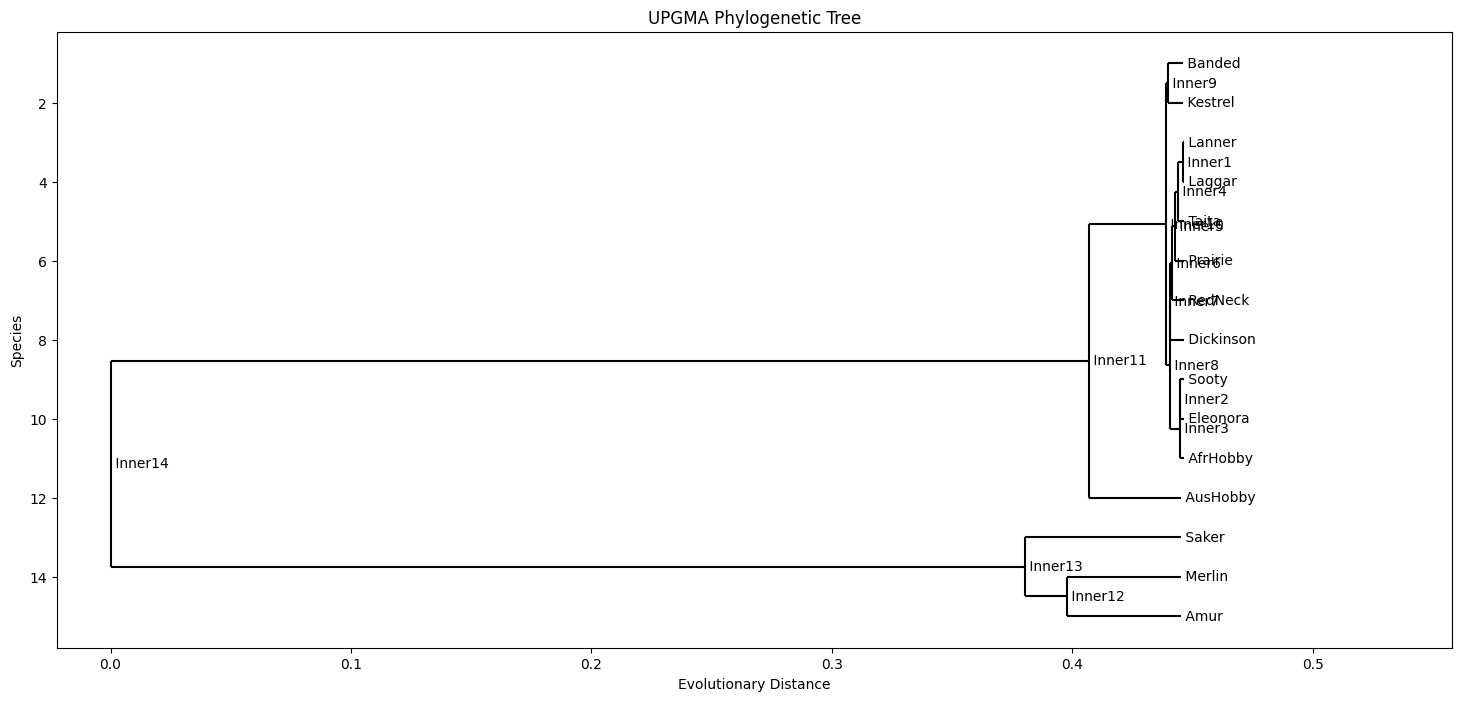

In [8]:
# Visualize ML tree
fig, ax = plt.subplots(figsize=(18, 8), dpi=100)
Phylo.draw(upgma_tree, axes=ax, do_show=False)

# Add labels and customize layout
ax.set_title("UPGMA Phylogenetic Tree")
ax.set_xlabel("Evolutionary Distance")
ax.set_ylabel("Species")

# Save the figure
fig.savefig("upgma_falcons_phylogenetic_tree.png")
plt.show()

In [9]:
import time
import tracemalloc

tracemalloc.start()

start_time = time.time()
upgma_constructor.build_tree(alignment)
end_time = time.time()

print(f"Time taken for Original UPGMA tree construction: {end_time - start_time} seconds")
print("Byte and peak: ",tracemalloc.get_traced_memory())

tracemalloc.stop()

Time taken for Original UPGMA tree construction: 0.3160226345062256 seconds
Byte and peak:  (15928, 44481)


In [10]:
# from scipy.stats import kendalltau

# # RF Distance Calculation
# def robinson_foulds_distance(tree1, tree2):
#     return kendalltau(tree1, tree2)[0]

# # Reference tree
# reference_tree = Phylo.read("upgma_waterfrog_tree.xml", "phyloxml")
# OR
# reference_tree = Phylo.read("upgma_waterfrog_tree.newick", "newick")

# # Calculate RF distance
# rf_distance = robinson_foulds_distance(reference_tree, ml_tree)
# print(f"Robinson-Foulds Distance: {rf_distance}")


In [11]:
# Convert the tree to a different format (optional)
Phylo.convert("upgma_falcons_tree.xml", "phyloxml", "upgma-falcons_tree.nex", "nexus")

1

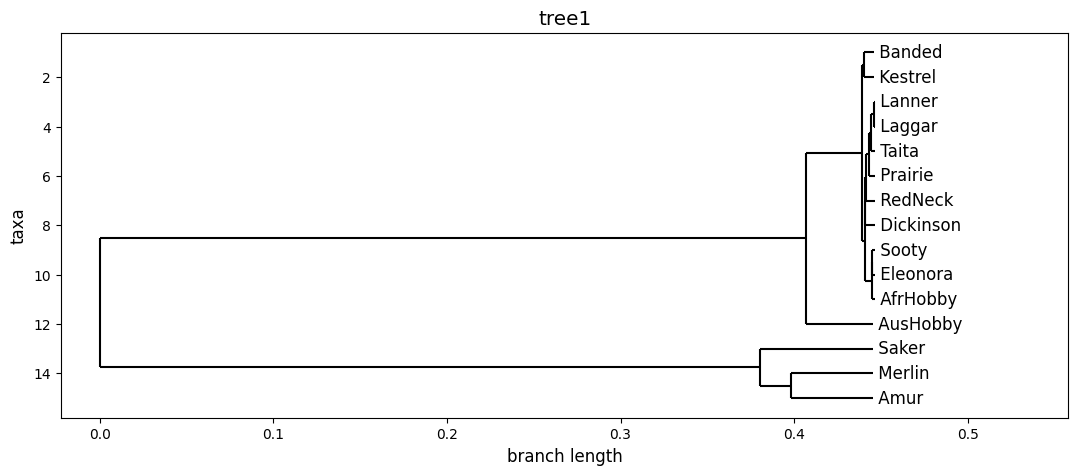

In [12]:
# ERASE THE INNER SO ITS EASIER FOR US TO SEE

import matplotlib
frog_nex = Phylo.read("upgma-falcons_edited.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(frog_nex, axes=axes)
fig.savefig("typicalfalcons2_cladogram")